# Supervised Machine Learning of Photometric Redshift

# Data set
- Train data to be used
- Firstly filter
- Need to add comments and fix up for readability

# TBD
- analysis
- treat data

In [1]:
import matplotlib.pyplot as plt
import csv, pandas as pd

untreated_train_data = pd.read_csv('galaxy_redshift_sims_train.csv', sep=',')
untreated_test_data = pd.read_csv('galaxy_redshift_sims_valid.csv', sep=',')





train_data = pd.read_csv('galaxy_redshift_sims_train.csv', sep=',')
test_data = pd.read_csv('galaxy_redshift_sims_valid.csv', sep=',')

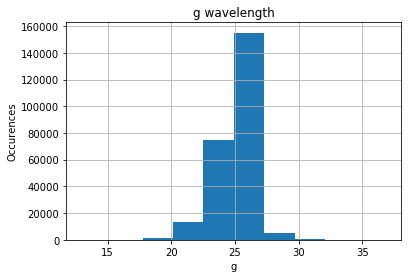

In [2]:
train_data.hist(column='g')
plt.ylabel('Occurences')
plt.xlabel('g')
plt.title('g wavelength')

plt.show()

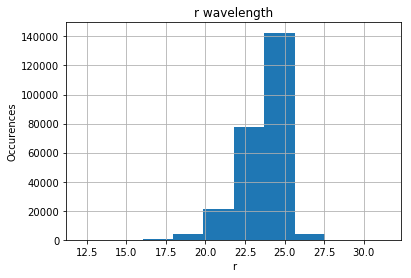

In [3]:
train_data.hist(column='r')
plt.ylabel('Occurences')
plt.xlabel('r')
plt.title('r wavelength')

plt.show()

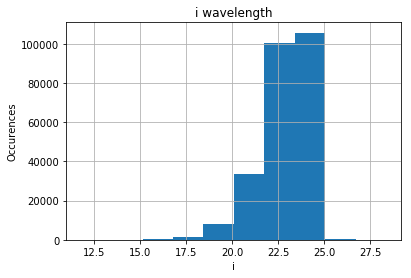

In [4]:
train_data.hist(column='i')
plt.ylabel('Occurences')
plt.xlabel('i')
plt.title('i wavelength')

plt.show()

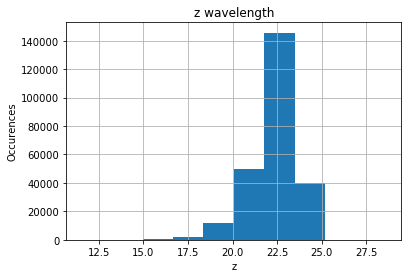

In [5]:
train_data.hist(column='z')
plt.ylabel('Occurences')
plt.xlabel('z')
plt.title('z wavelength')

plt.show()

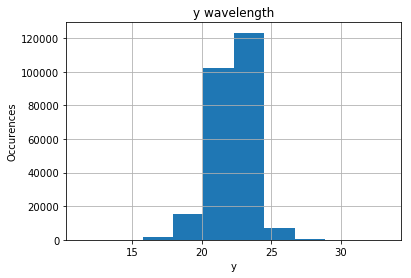

In [6]:
train_data.hist(column='y')
plt.ylabel('Occurences')
plt.xlabel('y')
plt.title('y wavelength')

plt.show()

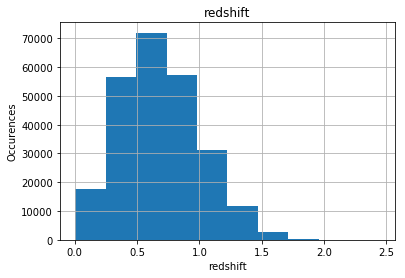

In [7]:
train_data.hist(column='redshift')
plt.ylabel('Occurences')
plt.xlabel('redshift')
plt.title('redshift')

plt.show()

# Now for Test Data set

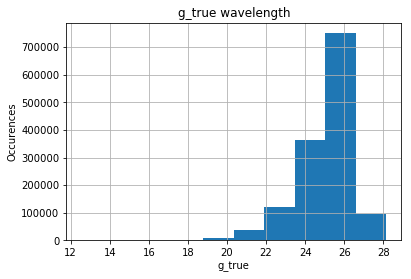

In [8]:
test_data.hist(column='g_true')
plt.ylabel('Occurences')
plt.xlabel('g_true')
plt.title('g_true wavelength')

plt.show()

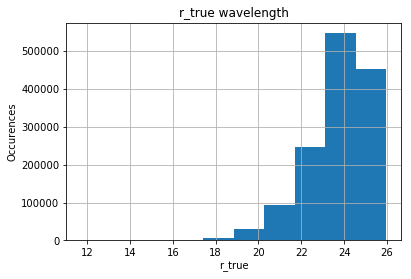

In [9]:
test_data.hist(column='r_true')
plt.ylabel('Occurences')
plt.xlabel('r_true')
plt.title('r_true wavelength')

plt.show()

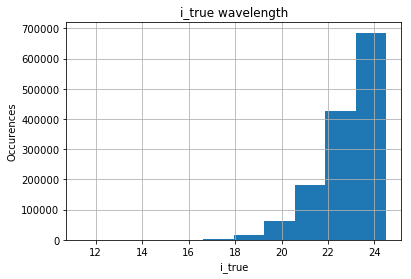

In [10]:
test_data.hist(column='i_true')
plt.ylabel('Occurences')
plt.xlabel('i_true')
plt.title('i_true wavelength')

plt.show()

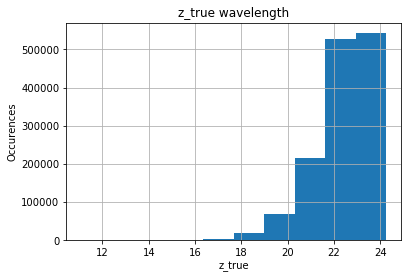

In [11]:
test_data.hist(column='z_true')
plt.ylabel('Occurences')
plt.xlabel('z_true')
plt.title('z_true wavelength')

plt.show()

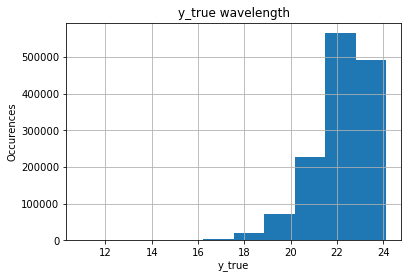

In [12]:
test_data.hist(column='y_true')
plt.ylabel('Occurences')
plt.xlabel('y_true')
plt.title('y_true wavelength')

plt.show()

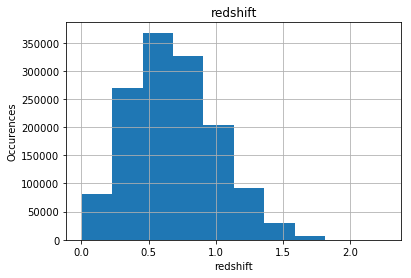

In [13]:
test_data.hist(column='redshift')
plt.ylabel('Occurences')
plt.xlabel('redshift')
plt.title('redshift')

plt.show()

# Compares

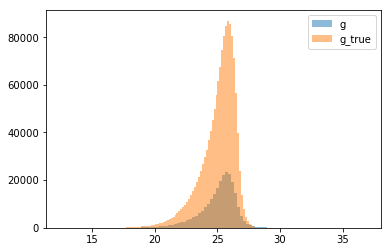

In [14]:
g = train_data['g']
g_true = test_data['g_true']

plt.hist(g, alpha=0.5, label='g', bins=100)
plt.hist(g_true, alpha=0.5, label='g_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Remove excess blue outlier points

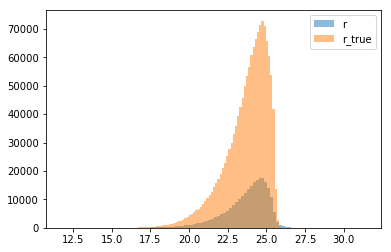

In [15]:
r = train_data['r']
r_true = test_data['r_true']

plt.hist(r, alpha=0.5, label='r', bins=100)
plt.hist(r_true, alpha=0.5, label='r_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Remove excess blue outlier points

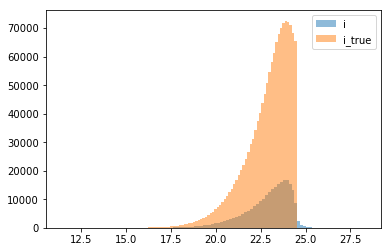

In [16]:
i = train_data['i']
i_true = test_data['i_true']

plt.hist(i, alpha=0.5, label='i', bins=100)
plt.hist(i_true, alpha=0.5, label='i_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Remove excess blue outlier points

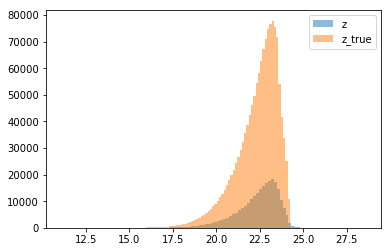

In [17]:
z = train_data['z']
z_true = test_data['z_true']

plt.hist(z, alpha=0.5, label='z', bins=100)
plt.hist(z_true, alpha=0.5, label='z_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Remove excess blue outlier points

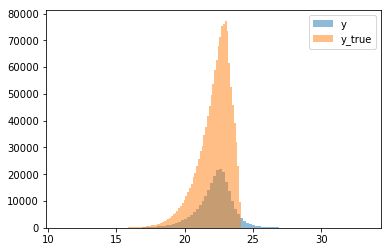

In [18]:
y = train_data['y']
y_true = test_data['y_true']

plt.hist(y, alpha=0.5, label='y', bins=100)
plt.hist(y_true, alpha=0.5, label='y_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Remove excess blue outlier points

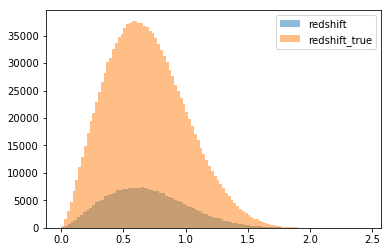

In [19]:
redshift = train_data['redshift']
redshift_true = test_data['redshift']

plt.hist(redshift, alpha=0.5, label='redshift', bins=100)
plt.hist(redshift_true, alpha=0.5, label='redshift_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Random Forest Algorithm
- Max depth of 23 and estimators of 70 seems to be a good choice. *NEEDS WORK*
- cross validate before fitting done

In [53]:
# import for Random Forest
from sklearn.ensemble import RandomForestRegressor
# import for cross_validation
from sklearn.model_selection import cross_val_score
from numpy import sqrt

# depth 10 gives 0.117197154379 with 30 n_est
# No more than number of features fr max depth
rf = RandomForestRegressor(max_depth=5, n_estimators = 30, random_state = 1, n_jobs=-1)
train_features = train_data[['y', 'g', 'r', 'i', 'z']]
train_target = train_data['redshift']

cross_validation = cross_val_score(rf, train_features, train_target, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation.mean()))

rf.fit(train_features, train_target)
# depth = 10, estimators = 3000, 0.11666127871

# Further depth barely improves anything

0.161691088525


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [21]:
Features = ['y_true', 'g_true', 'r_true', 'i_true', 'z_true']
test_features = test_data[Features]
# Value varies, still need to check(?)
prediction = rf.predict(test_features)
print "List of predictions:", prediction, "\n"

List of predictions: [ 0.48030882  0.54753107  0.50301723 ...,  1.46090883  0.70858979
  0.34881376] 



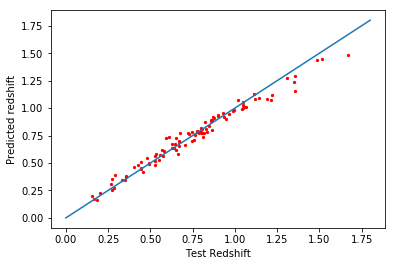

In [22]:
# Plot against redshift

plt.scatter(test_data['redshift'].tolist()[:100], prediction.tolist()[:100], s=5, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.show()

In [47]:
import numpy as np
# Another metric to use: Mean Absolute Error (look up sigma 68)
# sigma_68 = np.percentile(np.abs(y_prediction - y_test), 68)
# These 2 values should be close

prediction_difference = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference.append(prediction[x] - test_data['redshift'][x])
    x += 1

sigma_68 = np.percentile(np.abs(prediction_difference), 68)
    
print(sigma_68)

# sig_68 shows the difference of the 2 when 68% is "taken"



# Want to include the errors as features
# Try 30k points, should work hopefully on plots

[0.028281048595463876, 0.0098081964605826188, 0.060866580938537584, 0.032034358176594835, 0.0093313822153491266]
0.0537628037515


In [48]:
total = 0
for x in prediction_difference:
    total += np.abs(x)
    
mean = total/len(prediction_difference)
print(mean)

0.0469353679393


# Redo for extra features
- all variables have _x appended for distinction

In [23]:
# creation of the new features from existing features (only a temporary data set)
train_data['y-g'] = train_data['y'] - train_data['g']
train_data['g-r'] = train_data['g'] - train_data['r']
train_data['r-i'] = train_data['r'] - train_data['i']
train_data['i-z'] = train_data['i'] - train_data['z']

test_data['y-g'] = test_data['y_true'] - test_data['g_true']
test_data['g-r'] = test_data['g_true'] - test_data['r_true']
test_data['r-i'] = test_data['r_true'] - test_data['i_true']
test_data['i-z'] = test_data['i_true'] - test_data['z_true']

In [24]:
rf_x = RandomForestRegressor(max_depth=9, n_estimators = 30, random_state = 1)


train_features_x = train_data[['y', 'g', 'r', 'i', 'z', 'y-g', 'g-r', 'r-i', 'i-z']]
train_target_x = train_data['redshift']

cross_validation_x = cross_val_score(rf_x, train_features_x, train_target_x, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_x.mean()))

rf_x.fit(train_features_x, train_target_x)

# Improvement really small


0.112557338027


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [25]:
Features = ['y_true', 'g_true', 'r_true', 'i_true', 'z_true', 'y-g', 'g-r', 'r-i', 'i-z']
test_features_x = test_data[Features]
# Value varies, still need to check(?)
prediction_x = rf_x.predict(test_features_x)
print "List of predictions:", prediction_x, "\n"

List of predictions: [ 0.45284073  0.48099794  0.48621521 ...,  1.53093797  0.74550273
  0.36446757] 



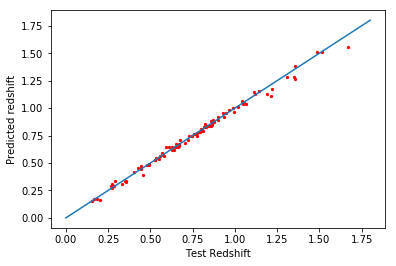

In [26]:
# Plot against redshift

plt.scatter(test_data['redshift'].tolist()[:100], prediction_x.tolist()[:100], s=5, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.show()

In [54]:
import numpy as np
# Another metric to use: Mean Absolute Error (look up sigma 68)
# sigma_68 = np.percentile(np.abs(y_prediction - y_test), 68)
# These 2 values should be close

prediction_difference_x = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_x.append(prediction_x[x] - test_data['redshift'][x])
    x += 1

sigma_68_x = np.percentile(np.abs(prediction_difference_x), 68)
    
print(sigma_68_x)

# sig_68 shows the difference of the 2 when 68% is "taken"



# Want to include the errors as features
# Try 30k points, should work hopefully on plots

0.0232235526132


In [58]:
total = 0
for x in prediction_difference_x:
    total += np.abs(x)
    
mean_x = total/len(prediction_difference_x)
print(mean_x)

0.0236940690659


In [27]:
# Spliting data points
# This may need work for efficiency

len1 = len(train_data)
len2 = len(train_data)/2
len3 = len(train_data)/4
len4 = len(train_data)/8
len5 = len(train_data)/16
len6 = len(train_data)/32
len7 = len(train_data)/64
len8 = len(train_data)/128
len9 = len(train_data)/256

rf_deg1 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg2 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg3 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg4 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg5 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg6 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg7 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg8 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg9 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)

score1 = cross_val_score(rf_deg1, train_features_x[:len1], train_target_x[:len1], scoring='neg_mean_squared_error')
score2 = cross_val_score(rf_deg2, train_features_x[:len2], train_target_x[:len2], scoring='neg_mean_squared_error')
score3 = cross_val_score(rf_deg3, train_features_x[:len3], train_target_x[:len3], scoring='neg_mean_squared_error')
score4 = cross_val_score(rf_deg4, train_features_x[:len4], train_target_x[:len4], scoring='neg_mean_squared_error')
score5 = cross_val_score(rf_deg5, train_features_x[:len5], train_target_x[:len5], scoring='neg_mean_squared_error')
score6 = cross_val_score(rf_deg6, train_features_x[:len6], train_target_x[:len6], scoring='neg_mean_squared_error')
score7 = cross_val_score(rf_deg7, train_features_x[:len7], train_target_x[:len7], scoring='neg_mean_squared_error')
score8 = cross_val_score(rf_deg8, train_features_x[:len8], train_target_x[:len8], scoring='neg_mean_squared_error')
score9 = cross_val_score(rf_deg9, train_features_x[:len9], train_target_x[:len9], scoring='neg_mean_squared_error')


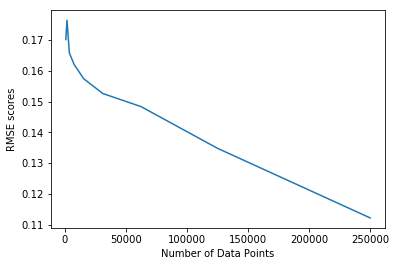

In [28]:
lens = [len1, len2, len3, len4, len5, len6, len7, len8, len9]
score = [sqrt(-score1.mean()), sqrt(-score2.mean()), sqrt(-score3.mean()), sqrt(-score4.mean()), sqrt(-score5.mean()), sqrt(-score6.mean()), sqrt(-score7.mean()), sqrt(-score8.mean()), sqrt(-score9.mean())]

plt.plot(lens, score)
plt.ylabel('RMSE scores')
plt.xlabel('Number of Data Points')
plt.show()

In [29]:
# Just to see scores
for x in score:
    print(x)

0.112165004026
0.134826164511
0.148374761336
0.152623537169
0.157435647733
0.162044774932
0.165822041776
0.176455727394
0.170175680511


# Linear Regression

In [30]:
# Test Linear Regression
# Test other models  (sci kit learn)
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train_features, train_target)

prediction_linear = linear_reg.predict(test_features)
print "List of predictions:", prediction_linear, "\n"

List of predictions: [ 0.52049612  0.53219149  0.56146971 ...,  0.92868094  0.65923944
  0.34922992] 



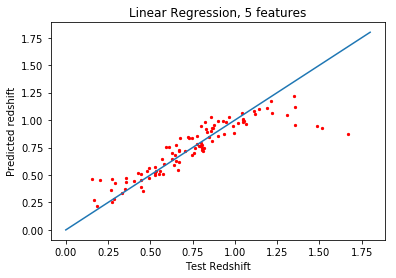

In [31]:
# Plot against redshift

plt.scatter(test_data['redshift'].tolist()[:100], prediction_linear.tolist()[:100], s=5, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Linear Regression, 5 features")
plt.show()

In [56]:
import numpy as np
# Another metric to use: Mean Absolute Error (look up sigma 68)
# sigma_68 = np.percentile(np.abs(y_prediction - y_test), 68)
# These 2 values should be close

prediction_difference_linear = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_linear.append(prediction_linear[x] - test_data['redshift'][x])
    x += 1

sigma_68_linear = np.percentile(np.abs(prediction_difference_linear), 68)
    
print(sigma_68_linear)

# sig_68 shows the difference of the 2 when 68% is "taken"



# Want to include the errors as features
# Try 30k points, should work hopefully on plots

0.0953277947895


In [57]:
total = 0
for x in prediction_difference_linear:
    total += np.abs(x)
    
mean_linear = total/len(prediction_difference_linear)
print(mean_linear)

0.0866012632608


In [32]:
# 
from sklearn.linear_model import BayesianRidge

bay_reg = BayesianRidge()
bay_reg.fit(train_features, train_target)

prediction_bayesian = bay_reg.predict(test_features)
print "List of predictions:", prediction_bayesian, "\n"

List of predictions: [ 0.52049831  0.53219279  0.56147236 ...,  0.92867792  0.65923956
  0.34923109] 



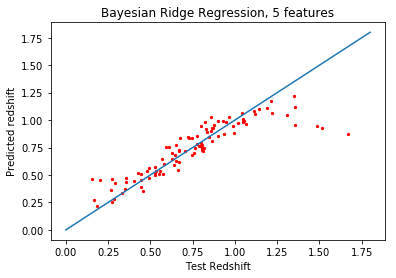

In [33]:
# Plot against redshift
plt.scatter(test_data['redshift'].tolist()[:100], prediction_bayesian.tolist()[:100], s=5, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Bayesian Ridge Regression, 5 features")
plt.show()

In [60]:
import numpy as np
# Another metric to use: Mean Absolute Error (look up sigma 68)
# sigma_68 = np.percentile(np.abs(y_prediction - y_test), 68)
# These 2 values should be close

prediction_difference_bayesian = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_bayesian.append(prediction_bayesian[x] - test_data['redshift'][x])
    x += 1

sigma_68_bayesian = np.percentile(np.abs(prediction_difference_bayesian), 68)
    
print(sigma_68_bayesian)

# sig_68 shows the difference of the 2 when 68% is "taken"



# Want to include the errors as features
# Try 30k points, should work hopefully on plots

0.095328299072


In [61]:
total = 0
for x in prediction_difference_bayesian:
    total += np.abs(x)
    
mean_bayesian= total/len(prediction_difference_bayesian)
print(mean_bayesian)

0.0866017522147


In [35]:
# Also try to switch up test and train values. Use test values as training data and training as test values.

In [36]:
# Prepare outline of research paper (bullet points)
# Intro, method, etc.
# Present as study of precision of photo redshift as function of data size
# Literature search (find out size of real data set for SDSS (specific sky survey), dark energy survey and LSST (find the site for each)
# SDSS already done, LSST starting soon, dark energy in progress (or starting soon)
# Can what I have help these surveys. Can you improve on these with your data.
# How many galaxies spectra, redshift research on the range for each survey + number of samples of galaxies
# Provides context for accuracy scaling with size
# Study and quantify how much you need to get good enough error
# Doubling helps? How much
# Size vs quality tradeoff
# Study change of error and sample size how it varies with signal of color (SN)
# Better to have small high quality dataset, or large low quality dataset?
# Might only be able to get good quality rarely due to moon setting (difficult to get good data instead of bad data)
